In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
def read_result(layers, gamma, alpha):
    results = []
    alpha_str = str(alpha).replace('.','_')
    gamma_str = str(gamma).replace('.','_')
    filename = f"{gamma_str}__{alpha_str}__{layers}.csv"
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        return [[float(x) for x in rec] for rec in reader]
    
def read_e(epsilon):
    eps = str(epsilon).replace('.','_')
    filename = f"eps_{eps}.csv"
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        return [[float(x) for x in rec] for rec in reader]
    
def read_generic(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        return [[float(x) for x in rec] for rec in reader]
    

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def moving_std(a, n=3):
    std 


In [8]:
result = read_result(2, 0.99, 0.001)

In [15]:
data = pd.DataFrame(result)

In [27]:
result_total_rewards = [np.sum(r) for r in result]
result_standard_deviation = [np.std(r) for r in result]

In [35]:
smooth_function = interp1d(np.arange(800), result_total_rewards, kind='cubic')

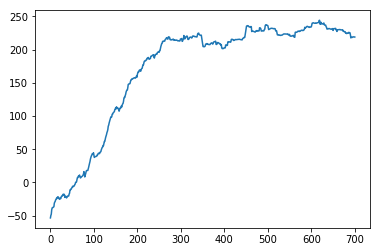

In [77]:
plt.plot(moving_average(result_total_rewards, 100))

gammas = [0.2, 0.5, 0.9, 0.99]
alphas = [0.001, 0.01, 0.1]
layers = [0, 1, 2]

In [78]:
data = {}
for layer in layers:
    for gamma in gammas:
        for alpha in alphas:
            hyperparameter_tuple = (layer, alpha, gamma)
            data[hyperparameter_tuple] = read_result(layer, gamma, alpha)

In [80]:
cumrewards = pd.DataFrame(result_total_rewards)

In [99]:
rolling_means = cumrewards.rolling(50).mean()
rolling_stds = cumrewards.rolling(50).std()

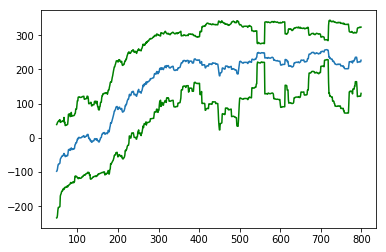

In [100]:
plt.plot(rolling_means)
plt.plot(rolling_means + rolling_stds, c='g')
plt.plot(rolling_means - rolling_stds, c='g')

## Make Model Plots

In [113]:
def get_layer_data(layer):
    gammas = [0.2, 0.5, 0.9, 0.99]
    alphas = [0.1, 0.01, 0.001]
    result_dict = {}
    for gamma in gammas:
        for alpha in alphas:
            result = data[(layer, alpha, gamma)]
            reward_sums = [np.sum(r) for r in result]
            result = pd.DataFrame(reward_sums).rolling(100)
            result_dict[(layer, alpha, gamma)] = result
    
    return result_dict
            

In [121]:
layer0 = get_layer_data(0)
layer1 = get_layer_data(1)
layer2 = get_layer_data(2)

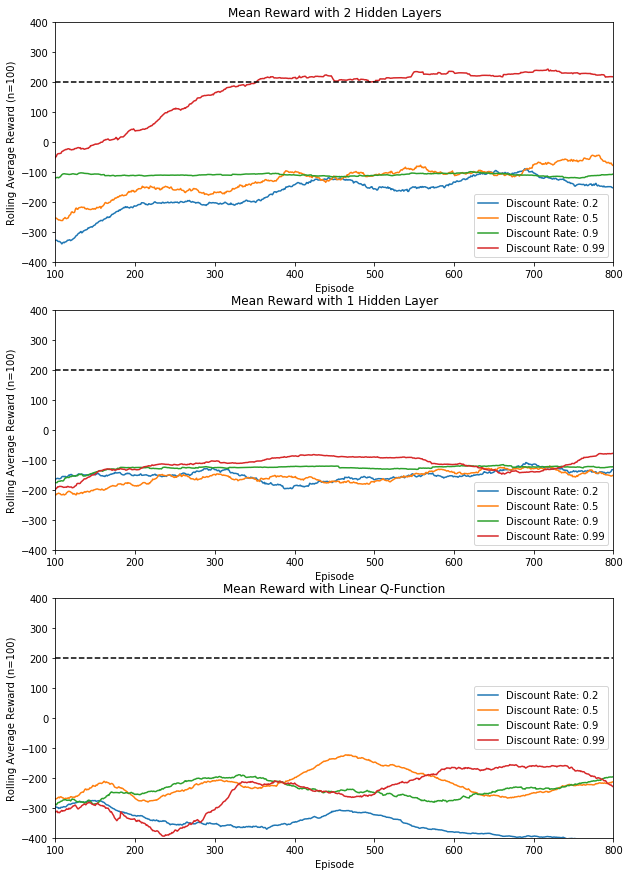

In [167]:
plt.figure(figsize=(10, 15))
plt.subplot(311)

gammas = [0.2, 0.5, 0.9, 0.99]

for gamma in gammas:
    plot_data = layer2[(2, 0.001, gamma)]
    plt.plot(plot_data.mean(), )

plt.title("Mean Reward with 2 Hidden Layers")
plt.xlim(100, 800)
plt.ylim(-400, 400)
plt.legend(['Discount Rate: ' + str(gamma) for gamma in gammas])
plt.axhline(y=200, c='black', linestyle='--')
plt.ylabel('Rolling Average Reward (n=100)')
plt.xlabel('Episode')
plt.subplot(312)


plt.title("Mean Reward with 1 Hidden Layer")
for gamma in gammas:
    plot_data = layer1[(1, 0.001, gamma)]
    plt.plot(plot_data.mean())

plt.ylim(-400, 400)
plt.xlim(100, 800)
plt.legend(['Discount Rate: ' + str(gamma) for gamma in gammas])
plt.axhline(y=200, c='black', linestyle='--')
plt.ylabel('Rolling Average Reward (n=100)')
plt.xlabel('Episode')
plt.subplot(313)

plt.title("Mean Reward with Linear Q-Function")
for gamma in gammas:
    plot_data = layer0[(0, 0.001, gamma)]
    plt.plot(plot_data.mean())
    
plt.ylim(-400, 400)
plt.xlim(100, 800)
plt.ylabel('Rolling Average Reward (n=100)')
plt.xlabel('Episode')
plt.legend(['Discount Rate: ' + str(gamma) for gamma in gammas])
plt.axhline(y=200, c='black', linestyle='--')
    

## Epsilons

In [4]:
eps_data = {}
for eps in [0.005, 0.01, 0.05, 0.1]:
    eps_data[eps] = read_e(eps)

In [5]:
def get_rolling_eps(data):
    df = pd.DataFrame([np.sum(r) for r in data])
    rolling_df = df.rolling(100)
    return rolling_df


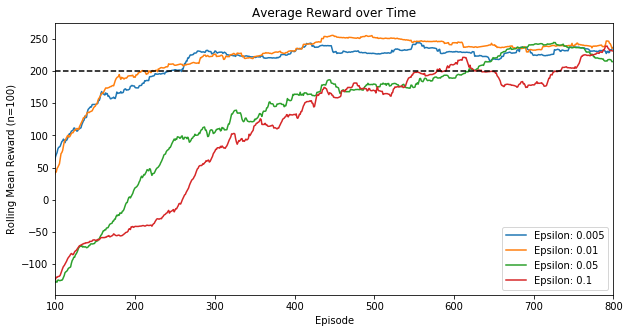

In [14]:
plt.figure(figsize=(10, 5))
for eps in [0.005, 0.01, 0.05, 0.1]:
    rol_data = get_rolling_eps(eps_data[eps])
    plt.plot(rol_data.mean())
    

plt.legend(['Epsilon: ' + str(eps) for eps in [0.005, 0.01, 0.05, 0.1]])
plt.title('Average Reward over Time')


plt.ylabel('Rolling Mean Reward (n=100)')
plt.xlabel('Episode')

plt.xlim(100, 800)
plt.axhline(y=200, c='black', linestyle='--')

In [6]:
len(eps_data[0.005])

800

## As a function of Alpha

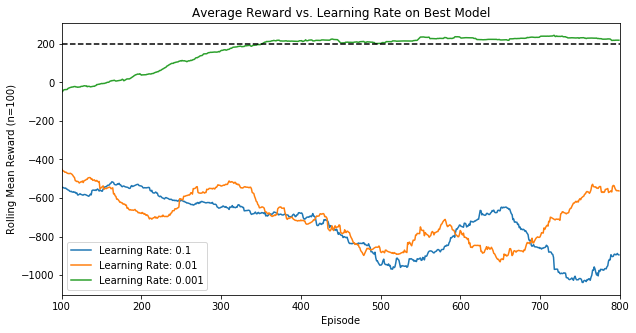

In [171]:
plt.figure(figsize=(10, 5))
for alpha in alphas:
    plot_data = layer2[(2, alpha, 0.99)]
    plt.plot(plot_data.mean())
    

plt.legend(['Learning Rate: ' + str(alpha) for alpha in alphas])
plt.title('Average Reward vs. Learning Rate on Best Model')
plt.ylabel('Rolling Mean Reward (n=100)')
plt.xlabel('Episode')

plt.xlim(100, 800)
plt.axhline(y=200, c='black', linestyle='--')

## Best Model Training
* Design analysis for mean average reward and rolling standard deviation.
* Design analysis of rolling crash landings - hovering - 

In [6]:
result = eps_data[0.01]

In [7]:
totals = [np.sum(r) for r in result]
crash_report = [r[-1] == -100 for r in result]
land_report = [r[-1] == 100 for r in result]
hover_report = [r[-1] > -100 and r[-1] < 100 for r in result]

In [8]:
rolling_totals = pd.DataFrame(totals).rolling(100)
rolling_crash = pd.DataFrame(crash_report).rolling(100)
rolling_land = pd.DataFrame(land_report).rolling(100)
rolling_hover = pd.DataFrame(hover_report).rolling(100)

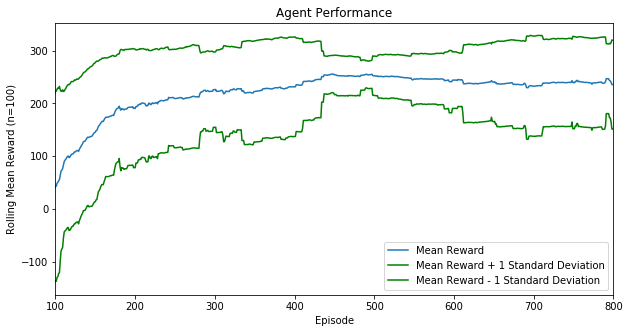

In [15]:
rolling_mean = rolling_totals.mean()
rolling_std = rolling_totals.std()

plt.figure(figsize=(10, 5))
plt.plot(rolling_mean)
plt.plot(rolling_mean + rolling_std, c='g')
plt.plot(rolling_mean - rolling_std, c='g')
plt.title('Agent Performance')
plt.ylabel('Rolling Mean Reward (n=100)')
plt.xlabel('Episode')
plt.xlim((100, 800))
plt.legend(['Mean Reward', 'Mean Reward + 1 Standard Deviation', 'Mean Reward - 1 Standard Deviation'])
plt.show()

Text(0.5, 1.0, 'Average Landing Scenario')

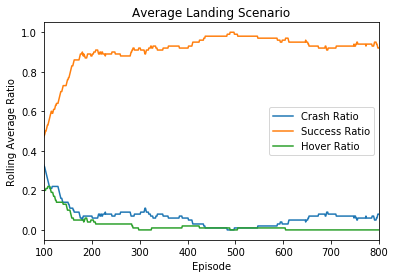

In [30]:
plt.plot(rolling_crash.mean())
plt.plot(rolling_land.mean())
plt.plot(rolling_hover.mean())
plt.legend(['Crash Ratio','Success Ratio', 'Hover Ratio'])
plt.xlim((100, 800))
plt.ylabel('Rolling Average Ratio')
plt.xlabel('Episode')
plt.title('Average Landing Scenario')

## Test Results

In [4]:
test_data = read_generic("test_data.csv")

Text(0.5, 1.0, 'Reward vs. Episode')

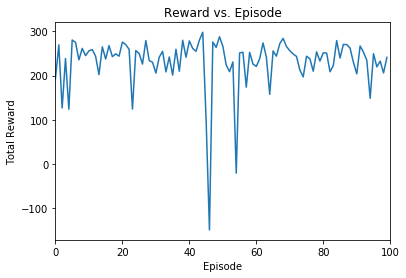

In [5]:
episode_rewards = [np.sum(r) for r in test_data]
plt.plot(episode_rewards)
plt.xlim(0, 100)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward vs. Episode')

/home/matt/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histogram of Episode Rewards on Trained Agent')

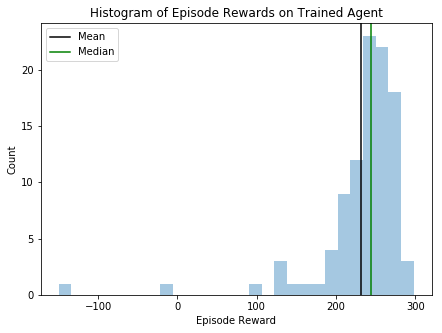

In [6]:
plt.figure(figsize=(7, 5))
sns.distplot(episode_rewards, kde=False)
plt.ylabel('Count')
plt.xlabel('Episode Reward')
mean_reward = np.mean(episode_rewards)
median_reward = np.median(episode_rewards)
plt.axvline(mean_reward, c='black')
plt.axvline(median_reward, c='green')
plt.legend(['Mean','Median'])
plt.title("Histogram of Episode Rewards on Trained Agent")

In [8]:
np.mean(episode_rewards)
np.median(episode_rewards)

243.8952628995637